# Kriptovaluták értékének ábrázolása

## Szükséges könyvtárak telepítése, importálása

In [1]:
# %pip install pandas
# %pip install plotly
# %pip install nbformat
# %pip install kaleido==0.1.0post1

In [2]:
import pandas as pd
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image

## Egy adathalmaz beolvasása..

In [3]:
df = pd.read_csv("data/HBAR-USD.csv", delimiter=",")

df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-17,0.416009,0.416009,0.087753,0.090177,0.090177,10855378
1,2019-09-18,0.090519,0.100272,0.080045,0.086921,0.086921,14772274
2,2019-09-19,0.087702,0.087721,0.054469,0.057924,0.057924,27324784
3,2019-09-20,0.058087,0.059061,0.047800,0.052490,0.052490,15814443
4,2019-09-21,0.052402,0.055408,0.045456,0.048021,0.048021,13144171
5,2019-09-22,0.048065,0.048237,0.038757,0.039735,0.039735,10549578
6,2019-09-23,0.039739,0.039803,0.035488,0.037645,0.037645,11214860
7,2019-09-24,0.037689,0.043997,0.029084,0.029641,0.029641,12197101
8,2019-09-25,0.029515,0.031111,0.025871,0.030202,0.030202,8906428
9,2019-09-26,0.030204,0.031022,0.027305,0.028966,0.028966,5190095


## ..és ábrázolása

In [4]:
fig = px.line(df, x="Date", y="Close")

fig.show()
#fig.write_image("line_1.png")

![line_1](line_1.png)

## Több adathalmaz hozzáadása és ábrázolása

A BTC értéke rendkívül magas a többihez képest és emiatt nem igazán olvasható rajta kívül a többi adat. Szükséges lesz az adatok normalizálsása.

In [5]:
df_hbar = pd.read_csv("data/HBAR-USD.csv", delimiter=",")
df_ada = pd.read_csv("data/ADA-USD.csv", delimiter=",")
df_btc = pd.read_csv("data/BTC-USD.csv", delimiter=",")
df_dot = pd.read_csv("data/DOT-USD.csv", delimiter=",")
df_eth = pd.read_csv("data/ETH-USD.csv", delimiter=",")
df_xlm = pd.read_csv("data/XLM-USD.csv", delimiter=",")

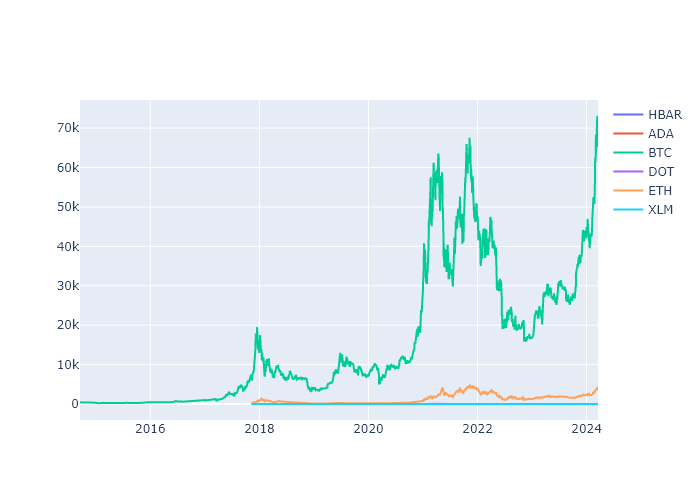

In [6]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=df_hbar["Date"], y=df_hbar["Close"], mode="lines", name="HBAR")
)
fig.add_trace(go.Scatter(x=df_ada["Date"], y=df_ada["Close"], mode="lines", name="ADA"))
fig.add_trace(go.Scatter(x=df_btc["Date"], y=df_btc["Close"], mode="lines", name="BTC"))
fig.add_trace(go.Scatter(x=df_dot["Date"], y=df_dot["Close"], mode="lines", name="DOT"))
fig.add_trace(go.Scatter(x=df_eth["Date"], y=df_eth["Close"], mode="lines", name="ETH"))
fig.add_trace(go.Scatter(x=df_xlm["Date"], y=df_xlm["Close"], mode="lines", name="XLM"))

#fig.show()
fig.write_image("line_2.png")
Image(filename="line_2.png")

In [7]:
import os
import pandas as pd

folder_path = "data/"
output_file = "data/output_2.xlsx"

csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

all_data = pd.DataFrame()

for csv_file in csv_files:
    df = pd.read_csv(os.path.join(folder_path, csv_file))

    ticker = csv_file.split("-")
    df["Ticker"] = ticker[0]

    all_data = pd.concat([all_data, df], ignore_index=True)

all_data.to_excel(output_file, index=False)

print("Adatok mentve: ", output_file)

Adatok mentve:  data/output_2.xlsx


## Normalizált adatok ábrázolása

Az adatokat átkonvertáljuk [0,1] intervallumra a könnyebb ábrázolhatóság érdekében.

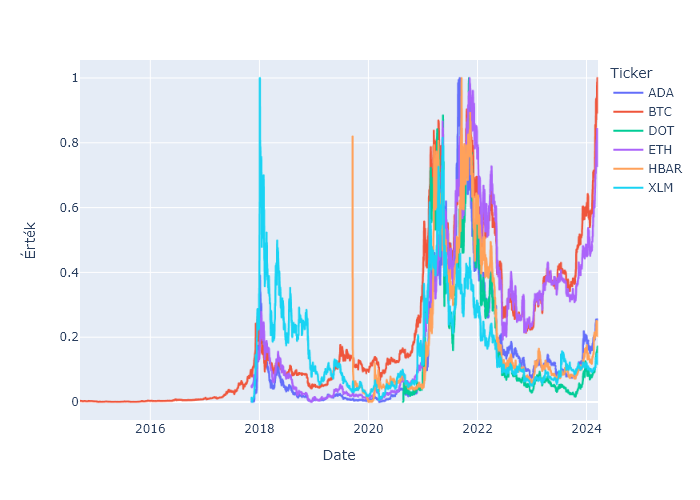

In [8]:
df = pd.read_excel("data/output.xlsx")

fig = px.line(df, x="Date", y="Normal", color="Ticker")

fig.update_layout(yaxis_title="Érték")

#fig.show()
fig.write_image("line_3.png")
Image(filename="line_3.png")

## Az időtengely túl hosszú

Létrehozunk egy új változót, ami csak a szükséges időintervallum adataint tárolja.

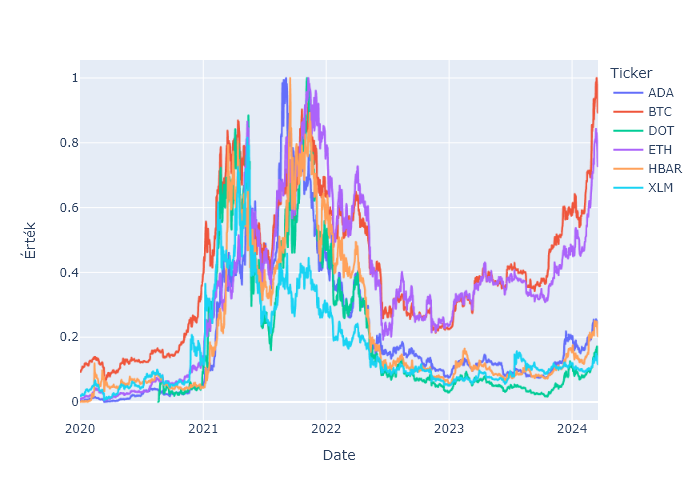

In [9]:
df = pd.read_excel("data/output.xlsx")

start_date = "2020-01-01"
date_df = df[(df["Date"] >= start_date)]

fig = px.line(date_df, x="Date", y="Normal", color="Ticker")

fig.update_layout(yaxis_title="Érték")

#fig.show()
fig.write_image("line_4.png")
Image(filename="line_4.png")

## Az időtengely túl részletes

Nézzünk további szűrési lehetőséget.

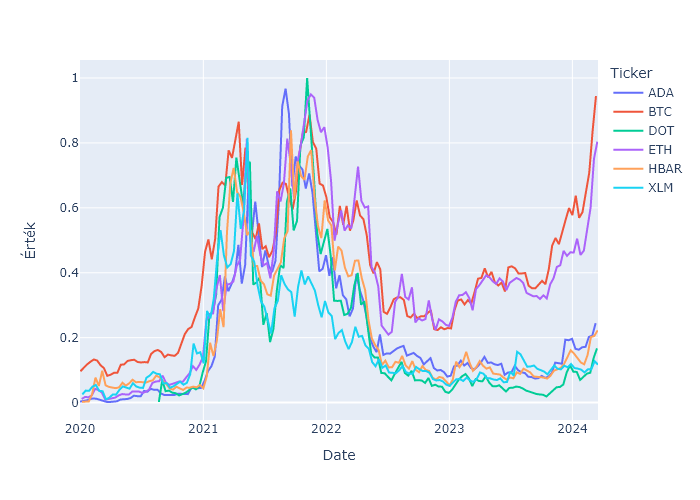

In [10]:
df = pd.read_excel("data/output.xlsx")

start_date = "2020-01-01"
n = 10

date_df = df[(df["Date"] >= start_date)]
freq_df = date_df[::n]

fig = px.line(freq_df, x="Date", y="Normal", color="Ticker")

fig.update_layout(yaxis_title="Érték")

#fig.show()
fig.write_image("line_5.png")
Image(filename="line_5.png")

## Próbáljuk ki a diagramot görbékkel

<code>line_shape="spline"</code> paraméter megadásával.

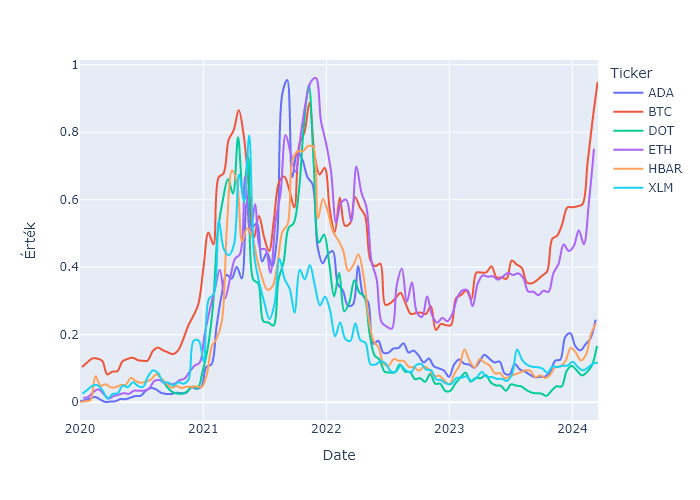

In [11]:
df = pd.read_excel("data/output.xlsx")

start_date = "2020-01-01"
n = 15

date_df = df[(df["Date"] >= start_date)]
freq_df = date_df[::n]

fig = px.line(freq_df, x="Date", y="Normal", color="Ticker", line_shape="spline")

fig.update_layout(yaxis_title="Érték")

#fig.show()
fig.write_image("line_6.png")
Image(filename="line_6.png")